In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm

In [6]:
df=pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [9]:
dummies=pd.get_dummies(df['Car Model'],dtype='int')
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [11]:
final=pd.concat([df,dummies],axis='columns')
final 

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [12]:
final.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)', 'Audi A5',
       'BMW X5', 'Mercedez Benz C class'],
      dtype='object')

In [ ]:
final=final.drop(['Car Model'],axis='columns')

In [16]:
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [18]:
y=final['Sell Price($)']
x=final.drop(['Sell Price($)'],axis='columns')
x

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [19]:
model=lm.LinearRegression()
model.fit(x,y)

LinearRegression()

In [29]:
def predict():
        a=int(input("Enter the Mileage: "))
        b=int(input("Enter the Age: "))
        c=input("Enter the Car Model: ")
        if c.startswith("A"):
            w=0
            e=0
        elif c.startswith("B"):
            w=1
            e=0
        elif c.startswith("M"):
            w=0
            e=1
        predicted=int(model.predict([[a,b,w,e]])[0])
        return predicted
print("The predicted price of the car is: $",predict())


The predicted price of the car is: $ 34326


c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
model.score(x,y)

0.9417050937281082

In [28]:
predict()

c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(33880.278234327285)

In [30]:
final.columns

Index(['Mileage', 'Sell Price($)', 'Age(yrs)', 'BMW X5',
       'Mercedez Benz C class'],
      dtype='object')

In [33]:
sp=final['Sell Price($)']
mil=final['Mileage']
ag=final['Age(yrs)']

In [31]:
import matplotlib.pyplot as plt

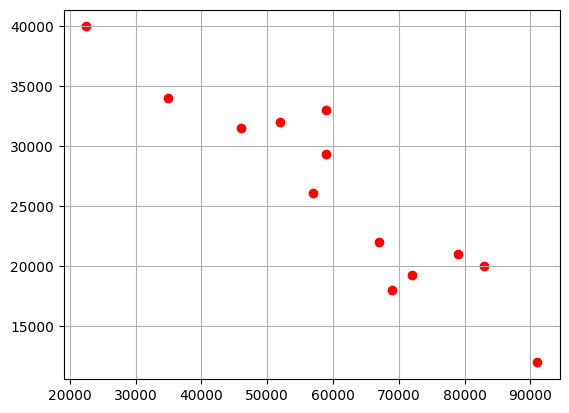

In [ ]:
plt.scatter(mil,sp,color='red')
plt.grid()

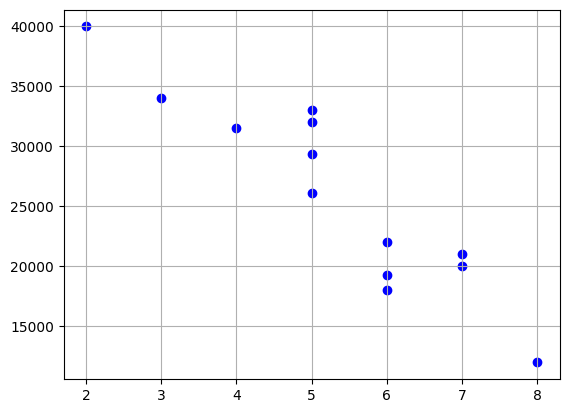

In [37]:
plt.scatter(ag,sp,color='blue')
plt.grid()

 ## TESTING AND TRAINING DATA

In [41]:
from sklearn.model_selection import train_test_split as tts

In [48]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)


In [52]:
x_train

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
11,79000,7,0,1
6,52000,5,0,0
2,57000,5,1,0
5,59000,5,0,0
10,83000,7,0,1
8,91000,8,0,0
1,35000,3,1,0
3,22500,2,1,0
12,59000,5,0,1
7,72000,6,0,0


In [54]:
clf=lm.LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [57]:
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.9767083954201651
0.5508464141707938


In [58]:
clf.predict(x_test)

array([29514.09247347, 18259.39498316, 28259.59173664])

## Logisctic regression


In [208]:
lf=pd.read_csv("insurance_data.csv")
lf.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


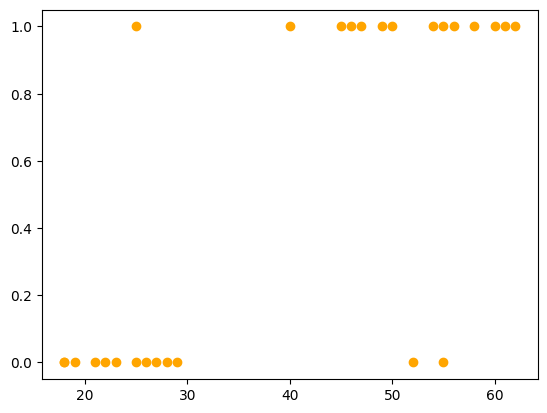

In [209]:
plt.scatter(lf.age,lf.bought_insurance,color='orange')

In [210]:
from sklearn.model_selection import train_test_split as tts

In [211]:
x1,x2,y1,y2= tts(lf[['age']],lf['bought_insurance'],test_size=0.2)

In [212]:
x1

,age
7,60
16,25
6,55
11,28
18,19
15,55
14,49
26,23
2,47
3,52


In [213]:
x2

,age
21,26
25,54
22,40
19,18
20,21
9,61


In [214]:
from sklearn import linear_model as lm

In [215]:
logmodel= lm.LogisticRegression()

In [216]:
logmodel.fit(x1,y1)

LogisticRegression()

In [217]:
logmodel.score(x2,y2)


1.0

c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  


Text(0.5, 0, 'Age')

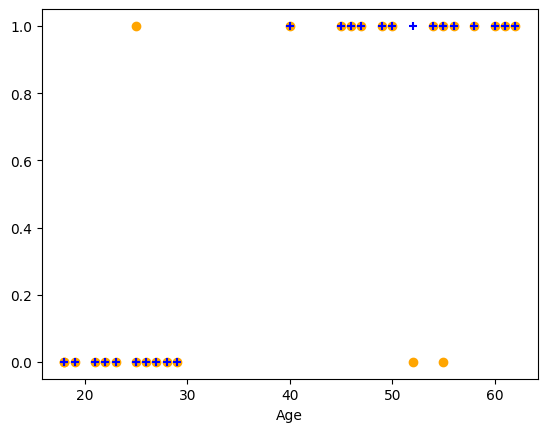

In [218]:
a=logmodel.predict(lf.age.values.reshape(-1,1))

plt.scatter(lf.age,lf.bought_insurance,color='orange')
plt.scatter(lf.age,a,color='blue',marker='+')
plt.xlabel('Age')

In [219]:
logmodel.predict_proba(x2)

array([[0.83686484, 0.16313516],
       [0.1529831 , 0.8470169 ],
       [0.49046245, 0.50953755],
       [0.93029435, 0.06970565],
       [0.90314505, 0.09685495],
       [0.07256013, 0.92743987]])

In [220]:
n=int(input("Enter the age: "))
a=int(logmodel.predict([[n]])[0])
if a==1:
    print("YESSSSSSSSSSSSS The person is likely to buy insurance.")
else:
    print("NOOOOOOOOOOOOOO The person is not likely to buy insurance.")


YESSSSSSSSSSSSS The person is likely to buy insurance.


c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  


In [221]:
hr=pd.read_csv("HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [222]:
left = hr[hr.left==1]
retained = hr[hr.left==0]


<Axes: xlabel='salary'>

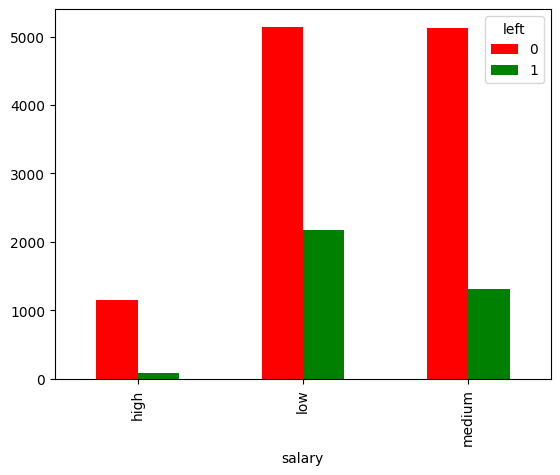

In [223]:
pd.crosstab(hr.salary,hr.left).plot(kind='bar',color=['red','green'])

In [224]:
grouped=hr.groupby('left').mean(numeric_only=True)
grouped

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [225]:
mean_left_0 = grouped.loc[0]
mean_left_1 = grouped.loc[1]
print(mean_left_0)
print(mean_left_1)

# Compute ratios
print("Feature-wise mean ratios (left=1 / left=0):\n")
for col in grouped.columns:
    ratio = mean_left_1[col] / mean_left_0[col]
    print(f"{col}: {ratio:.4f}")

satisfaction_level         0.666810
last_evaluation            0.715473
number_project             3.786664
average_montly_hours     199.060203
time_spend_company         3.380032
Work_accident              0.175009
promotion_last_5years      0.026251
Name: 0, dtype: float64
satisfaction_level         0.440098
last_evaluation            0.718113
number_project             3.855503
average_montly_hours     207.419210
time_spend_company         3.876505
Work_accident              0.047326
promotion_last_5years      0.005321
Name: 1, dtype: float64
Feature-wise mean ratios (left=1 / left=0):

satisfaction_level: 0.6600
last_evaluation: 1.0037
number_project: 1.0182
average_montly_hours: 1.0420
time_spend_company: 1.1469
Work_accident: 0.2704
promotion_last_5years: 0.2027


In [226]:
hr2=pd.get_dummies(hr.salary,dtype='int')
hr2.head(10)

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [227]:
hrf=pd.concat([hr,hr2],axis="columns")

In [228]:
hrf.drop(['salary'],axis='columns',inplace=True)

In [229]:
hrf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


In [230]:
x=hrf.drop(['left'],axis='columns')
x=x.drop(['Department'],axis='columns')
y=hrf['left']


In [231]:
from sklearn.model_selection import train_test_split as tts

In [232]:
x1,x2,y1,y2=tts(x,y,test_size=0.2)

In [233]:
from sklearn import linear_model as lm

In [234]:
logistic=lm.LogisticRegression()

In [235]:
logistic.fit(x1,y1)

c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [236]:
result=logistic.predict(x2)
result



array([0, 0, 0, ..., 0, 0, 0], shape=(3000,))

In [237]:
sum = 0
for pred, actual in zip(result, y2):
    if pred == actual:
        sum += 1

print("Total correct predictions:", sum)
print("Accuracy:", (sum/len(result))*100, "%")

Total correct predictions: 2366
Accuracy: 78.86666666666666 %


In [238]:
logistic.score(x2,y2)

0.7886666666666666

In [239]:
logistic.score(x1,y1)

0.8024835402950246

## MultiClass Classification

In [ ]:
from sklearn.datasets import load_digits as ld

Automatically created module for IPython interactive environment


In [246]:
dir(ld())

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits=ld()
ld().data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

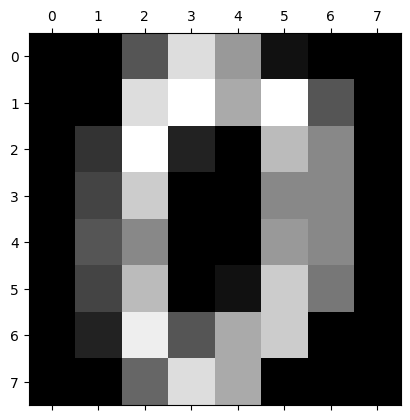

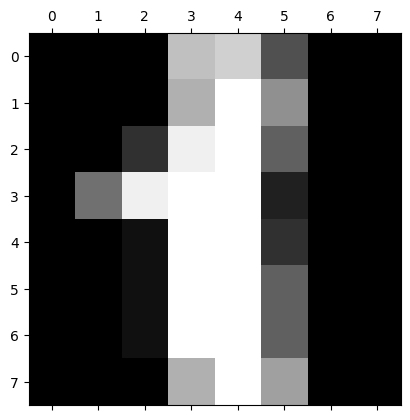

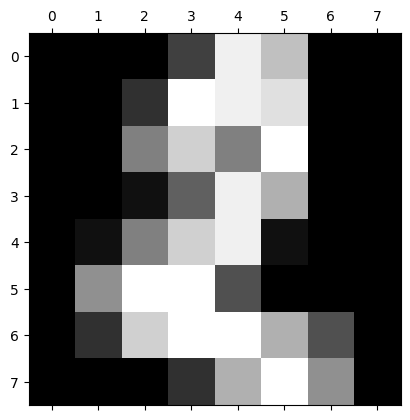

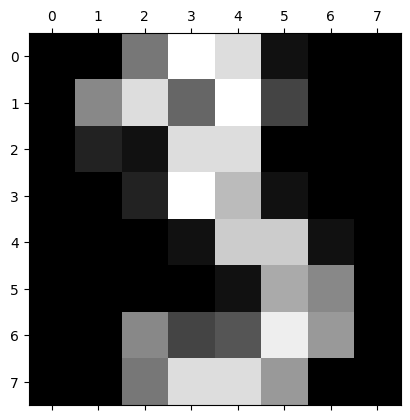

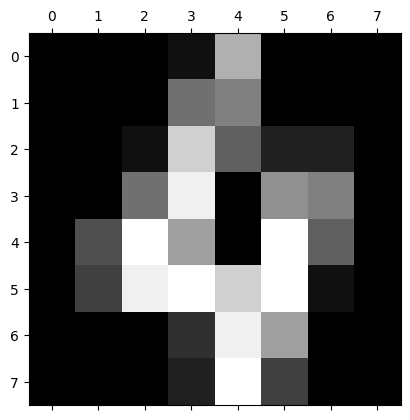

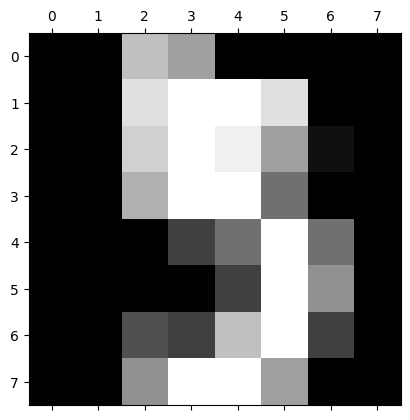

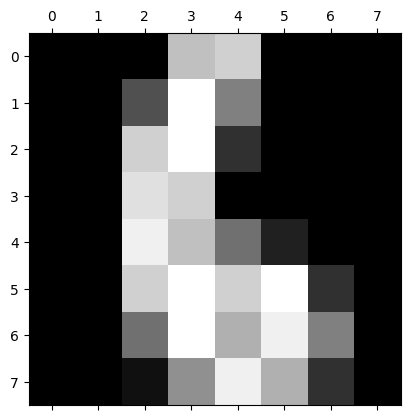

In [255]:
# plt.gray()

for i in range(7):
    plt.matshow(digits.images[i])

In [257]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [268]:
x1, x2, y1, y2 = tts(digits.data, digits.target, test_size=0.2)

In [260]:
x1

array([[ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  7.,  1.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 16.,  4.,  0.],
       [ 0.,  0.,  0., ..., 16., 16.,  6.],
       [ 0.,  0.,  0., ...,  3.,  0.,  0.]], shape=(1437, 64))

In [261]:
x2

array([[ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  1., 10., ...,  5.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  6., ...,  4.,  0.,  0.],
       [ 0.,  3., 11., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  7.,  0.,  0.]], shape=(360, 64))

In [262]:
model=lm.LogisticRegression()


In [269]:
model.fit(x1,y1)

c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [270]:
model.score(x2,y2)

0.9666666666666667

In [271]:
model.score(x1,y1)

1.0

In [284]:
for i in range(len(y2)):
    if model.predict(x2)[i]!=y2[i]:
        plt.gray()
        print(model.predict(x2)[i],y2[i])
        print(i)
        # plt.matshow(digits.images[i])

8 1
17
1 2
58
9 3
72
5 0
131
5 8
139
7 5
151
3 9
160
4 5
181
1 4
229
6 8
248
1 8
263
2 8
299


<Figure size 640x480 with 0 Axes>

In [285]:
y_p=model.predict(x2)

In [369]:
from sklearn.metrics import confusion_matrix as cmx

In [370]:
cm= cmx(y_p, y2)

In [ ]:
import seaborn as sns


Text(95.72222222222221, 0.5, 'Actual')

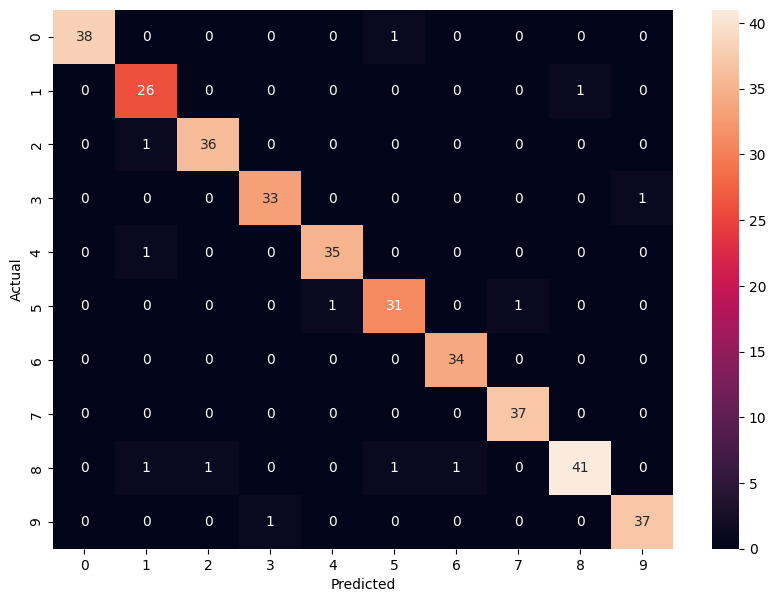

In [298]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [302]:
from sklearn.datasets import load_iris as iri

In [303]:
iris=iri()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [316]:
ir=pd.DataFrame(iris.data, columns=iris.feature_names)
ir

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [333]:
b=pd.DataFrame(iris.target,columns=['Flower'])
b

,Flower
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [335]:
fx=pd.concat([ir,b],axis="columns")
fx[134:145]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
134,6.1,2.6,5.6,1.4,2
135,7.7,3.0,6.1,2.3,2
136,6.3,3.4,5.6,2.4,2
137,6.4,3.1,5.5,1.8,2
138,6.0,3.0,4.8,1.8,2
139,6.9,3.1,5.4,2.1,2
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2


In [348]:
fx.Flower.replace({0:'setosa',1:'versicolor',2:'virginica'},inplace=True)


C:\Users\aditya\AppData\Local\Temp\ipykernel_31660\231648516.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fx.Flower.replace({0:'setosa',1:'versicolor',2:'virginica'},inplace=True)


In [349]:
fx

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [351]:
c=fx.Flower

In [354]:
model=lm.LogisticRegression()

In [355]:
x1,x2,x3,x4=tts(ir,c,test_size=0.2)

In [356]:
x1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
92,5.8,2.6,4.0,1.2
121,5.6,2.8,4.9,2.0
136,6.3,3.4,5.6,2.4
127,6.1,3.0,4.9,1.8
34,4.9,3.1,1.5,0.2
...,...,...,...,...
149,5.9,3.0,5.1,1.8
105,7.6,3.0,6.6,2.1
145,6.7,3.0,5.2,2.3
55,5.7,2.8,4.5,1.3


In [358]:
model.fit(x1,x3)

LogisticRegression()

In [359]:
model.predict(x2)

array(['virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa'], dtype=object)

In [361]:
model.score(x2,x4)

0.9666666666666667

In [365]:
model.score(ir,c)

0.98

In [363]:
model.score(x1,x3)

0.9833333333333333

In [366]:
adc=model.predict(ir)

Text(95.72222222222221, 0.5, 'Actual')

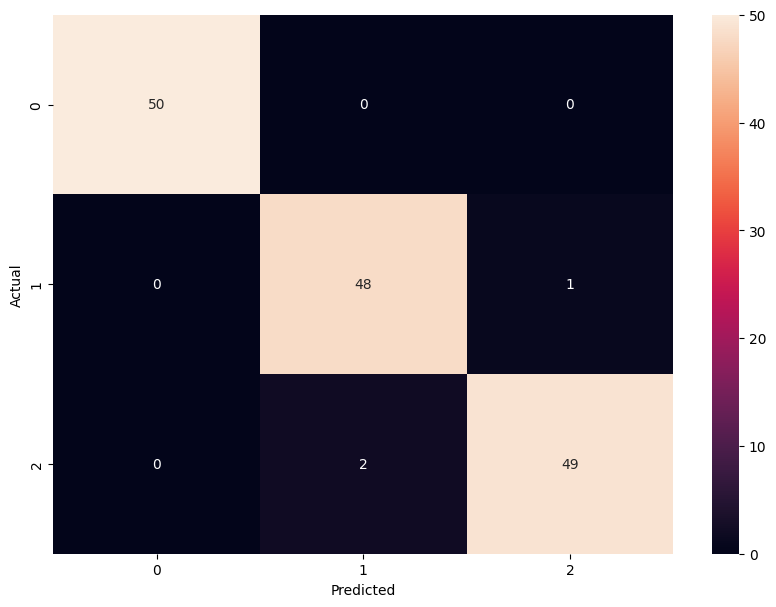

In [375]:
# Create confusion matrix
confusion_matrix = cmx(adc, c)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# decision tree

In [377]:
df=pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [392]:
a=df.groupby("company")
g=a.get_group("google")
f=a.get_group("facebook")


In [396]:

input=df.drop('salary_more_then_100k',axis='columns')
target=df['salary_more_then_100k']
input

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [397]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [399]:
from sklearn.preprocessing import LabelEncoder as le

In [405]:
l=le()


In [406]:
input['company'] = l.fit_transform(input['company'])
input['job'] = l.fit_transform(input['job'])
input['degree'] = l.fit_transform(input['degree'])

In [407]:
input

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [409]:
from sklearn import tree as t

In [410]:
dect=t.DecisionTreeClassifier()

In [418]:
x1,x2,y1,y2=tts(input,target,test_size=0.2)

In [419]:
dect.fit(x1,y1)

DecisionTreeClassifier()

In [420]:
print(dect.predict(x2))
print(y2)

[1 0 1 0]
11    1
0     0
1     0
9     1
Name: salary_more_then_100k, dtype: int64


In [421]:
dect.score(input,target)

0.875

In [422]:
dect.score(x2,y2)

0.5

In [424]:
tt=pd.read_csv("titanic.csv")
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [426]:
tx=tt.drop(['PassengerId', 'Name', 'Ticket','Fare'], axis='columns')
tx

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,NaN,1,2,NaN,S
889,1,1,male,26.0,0,0,C148,C


In [427]:
a=tx.groupby(tx.Survived).mean(numeric_only=True)
a

,Pclass,Age,SibSp,Parch
Survived,,,,
0,2.531876,30.626179,0.553734,0.329690
1,1.950292,28.343690,0.473684,0.464912


In [430]:
l=le()

In [ ]:
tx['sex_n']=l.fit_transform(tx.Sex)

In [443]:
tx.drop('Cabin',axis='columns',inplace=True)

In [444]:
tx

,Survived,Pclass,Age,SibSp,Parch,Embarked,sex_n
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,0
2,1,3,26.0,0,0,S,0
3,1,1,35.0,1,0,S,0
4,0,3,35.0,0,0,S,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,S,1
887,1,1,19.0,0,0,S,0
888,0,3,NaN,1,2,S,0
889,1,1,26.0,0,0,C,1


In [450]:
dec=t.DecisionTreeClassifier()

In [455]:
b=tx.Survived
a=tx.drop(['Survived','Embarked'],axis='columns')
a


,Pclass,Age,SibSp,Parch,sex_n
0,3,22.0,1,0,1
1,1,38.0,1,0,0
2,3,26.0,0,0,0
3,1,35.0,1,0,0
4,3,35.0,0,0,1
...,...,...,...,...,...
886,2,27.0,0,0,1
887,1,19.0,0,0,0
888,3,NaN,1,2,0
889,1,26.0,0,0,1


In [456]:
x1, x2, y1, y2 = tts(a,b, test_size=0.2)

In [458]:
model=dec.fit(x1,y1)
model

DecisionTreeClassifier()

In [459]:
model.score(x2,y2)

0.7541899441340782

In [460]:
model.score(x1,y1)

0.9311797752808989

In [461]:
model.score(a,b)

0.8956228956228957

# SUPPORT VECTOR MACHINES

In [462]:
from sklearn.datasets import load_iris as liris

In [464]:
iris=liris()

In [465]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [466]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [468]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [469]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [472]:
df['flower']=df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [477]:
df0=df[df.flower=='setosa']
df1=df[df.flower=='versicolor']
df2=df[df.flower=='virginica']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor


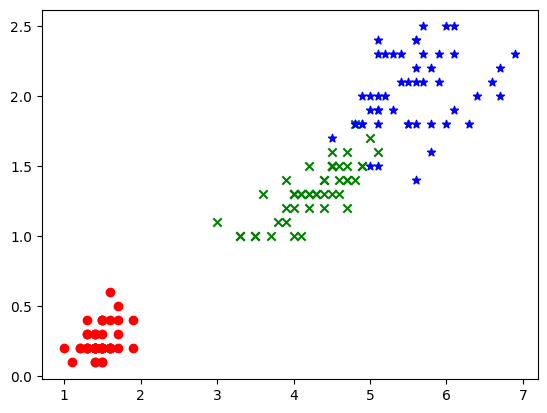

In [488]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='o',color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='x',color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],marker='*',color='blue')



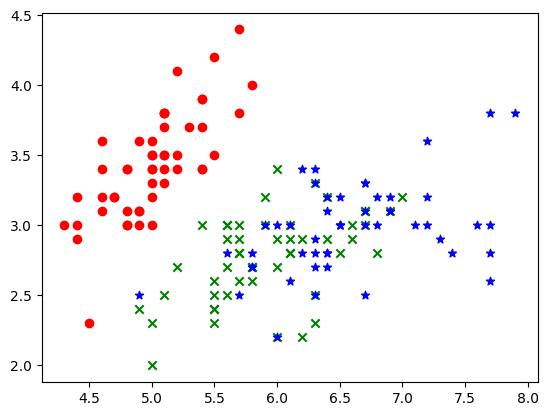

In [493]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='o',color='red')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='x',color='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker='*',color='blue')


In [494]:
x1,x2,y1,y2=tts(df.drop(['flower', 'target'], axis='columns'), df['flower'], test_size=0.2)

In [495]:
x1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
59,5.2,2.7,3.9,1.4
61,5.9,3.0,4.2,1.5
129,7.2,3.0,5.8,1.6
41,4.5,2.3,1.3,0.3
2,4.7,3.2,1.3,0.2
...,...,...,...,...
92,5.8,2.6,4.0,1.2
42,4.4,3.2,1.3,0.2
24,4.8,3.4,1.9,0.2
125,7.2,3.2,6.0,1.8


In [497]:
from sklearn.svm import SVC as svc

In [527]:
model=svc(C=4)

In [528]:
model.fit(x1,y1)

SVC(C=4)

In [529]:
model.score(x2,y2)

0.9333333333333333

In [530]:
model.score(df.drop(['flower', 'target'], axis='columns'), df['flower'])

0.9866666666666667

In [531]:
model.score(x1,y1)

1.0

In [504]:
model.predict(x2)

array([np.str_('setosa'), np.str_('versicolor'), np.str_('virginica'),
       np.str_('virginica'), np.str_('versicolor'), np.str_('setosa'),
       np.str_('setosa'), np.str_('virginica'), np.str_('virginica'),
       np.str_('setosa'), np.str_('virginica'), np.str_('setosa'),
       np.str_('versicolor'), np.str_('versicolor'),
       np.str_('versicolor'), np.str_('versicolor'),
       np.str_('versicolor'), np.str_('virginica'), np.str_('setosa'),
       np.str_('virginica'), np.str_('versicolor'), np.str_('virginica'),
       np.str_('versicolor'), np.str_('setosa'), np.str_('setosa'),
       np.str_('versicolor'), np.str_('setosa'), np.str_('versicolor'),
       np.str_('versicolor'), np.str_('setosa')], dtype=object)

In [533]:
from sklearn.datasets import load_digits as ld

In [536]:
dig=ld()
dir(dig)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [545]:
d=pd.DataFrame(dig.data, columns=dig.feature_names)
d['target_names']=dig.target
d

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target_names
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [ ]:
a=d.groupby('target_names')



In [561]:
a.get_group(0)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target_names
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0,0
20,0.0,0.0,3.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,12.0,13.0,4.0,0.0,0.0,0
30,0.0,0.0,10.0,14.0,11.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,11.0,16.0,12.0,3.0,0.0,0.0,0
36,0.0,0.0,6.0,14.0,10.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,16.0,11.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,0.0,0.0,10.0,11.0,7.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,12.0,8.0,0.0,0.0,0.0,0
1745,0.0,0.0,7.0,14.0,8.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,7.0,0.0,0.0,0.0,0
1746,0.0,0.0,9.0,15.0,6.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,8.0,15.0,11.0,4.0,0.0,0.0,0
1768,0.0,0.0,5.0,16.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,15.0,16.0,8.0,1.0,0.0,0


In [570]:
model=svc(C=5)

In [608]:
x1, x2, y1, y2 = tts(d.drop(['target_names'], axis='columns'), d['target_names'], test_size=0.2)    

In [572]:
model.fit(x1,y1)

SVC(C=5)

In [573]:
model.score(x2,y2)

0.9972222222222222

In [574]:
model.score(x1,y1)

0.9993041057759221

In [575]:
model.score(d.drop(['target_names'], axis='columns'), d['target_names'])

0.9988870339454646

In [576]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [602]:
model=rfc(n_estimators=100)


In [609]:
model.fit(x1,y1)

RandomForestClassifier()

In [610]:
model.score(x2,y2)

0.9638888888888889

In [611]:
model.score(x1,y1)

1.0

In [612]:
model.score(d.drop(['target_names'], axis='columns'), d['target_names'])

0.9927657206455203

In [615]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.tree import DecisionTreeClassifier as dtc 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import load_digits as ld


In [616]:
digits=ld()

In [617]:
x1,x2,y1,y2= tts(digits.data,digits.target, test_size=0.2)

In [618]:
lr=lr()

In [619]:
lr.fit(x1,y1)

c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [620]:
lr.score(x2,y2)

0.9722222222222222

In [621]:
svm=SVC()
svm.fit(x1,y1)
svm.score(x2,y2)    

0.9916666666666667

In [622]:
rf=rfc(n_estimators=100)
rf.fit(x1,y1)
rf.score(x2,y2)

0.9888888888888889

In [624]:
from sklearn.model_selection import KFold as kf

In [625]:
k=kf(n_splits=5, shuffle=True)

In [626]:
from sklearn.model_selection import StratifiedKFold as sfk

In [627]:
folds=sfk(n_splits=5,shuffle=True)

In [ ]:
for i1,i2 in folds.

In [634]:
from sklearn.model_selection import cross_val_score as cvp

In [638]:
a=cvp(lr,digits.data, digits.target)
print(a)
a=a.mean()
print(a)

c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[0.92222222 0.86944444 0.94150418 0.93871866 0.89693593]
0.9137650882079852


c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [640]:
b=cvp(svm,digits.data, digits.target)
print(b)
print(b.mean())

[0.96111111 0.94444444 0.98328691 0.98885794 0.93871866]
0.9632838130609718


In [643]:
c=cvp(dtc(),digits.data, digits.target)
print(c)
print(c.mean())

[0.78055556 0.71388889 0.80222841 0.84679666 0.81337047]
0.7913679975239865


# UNSUPERVISED LEARNING- KMEANS CLUSTERING

In [645]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


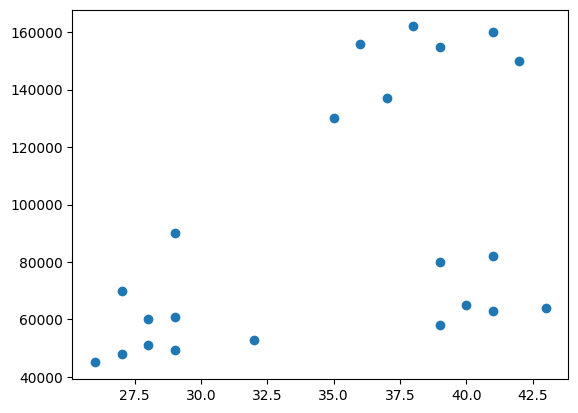

In [646]:
plt.scatter(df.Age,df["Income($)"])

In [647]:
from sklearn.cluster import KMeans

In [651]:
km=KMeans(n_clusters=3)
km 

KMeans(n_clusters=3)

In [655]:
a=df.drop(["Name"], axis="columns")
a

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [656]:
km.fit_predict(a)

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [668]:
df["cluster"]=km.fit_predict(a)
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [669]:
df1=df[df["cluster"]==0]
df2=df[df["cluster"]==1]
df3=df[df["cluster"]==2]

In [670]:
df1

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
19,Alia,39,80000,0
20,Sid,41,82000,0


Text(0.5, 0, 'Age')

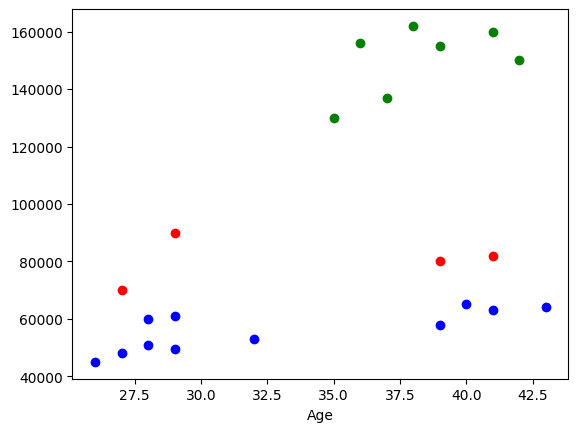

In [671]:
plt.scatter(df1.Age, df1["Income($)"], color='red', label='Cluster 1')
plt.scatter(df2.Age, df2["Income($)"], color='green', label='Cluster 2')
plt.scatter(df3.Age, df3["Income($)"], color='blue', label='Cluster 3')
plt.xlabel('Age')   

In [672]:
from sklearn.preprocessing import MinMaxScaler as mms

In [673]:
mms=mms()

In [677]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [679]:
mms.fit(df[['Income($)']])

MinMaxScaler()

In [680]:
df["Income($)"]=mms.transform(df[['Income($)']])

In [681]:
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [684]:
mms.fit(df[['Age']])

MinMaxScaler()

In [686]:
df['Age'] = mms.transform(df[['Age']])

In [687]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [688]:
y=km.fit_predict(df[['Income($)','Age']])

In [689]:
df.cluster=y

In [690]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [ ]:
df1=df[df["cluster"]==0]
df2=df[df["cluster"]==1]
df3=df[df["cluster"]==2]

In [694]:
x=km.cluster_centers_
x

array([[0.8974359 , 0.72268908],
       [0.11633428, 0.1372549 ],
       [0.2022792 , 0.85294118]])

Text(0.5, 0, 'Age')

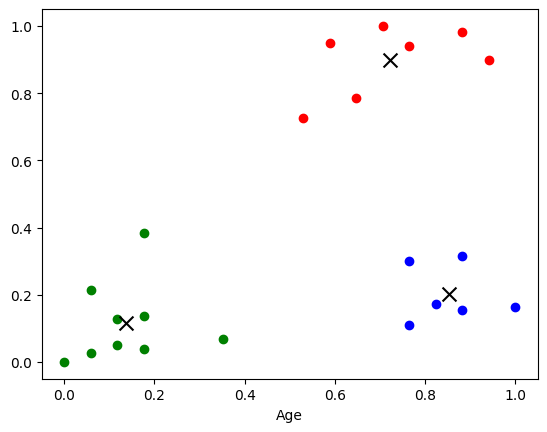

In [697]:
plt.scatter(df1.Age, df1["Income($)"], color='red', label='Cluster 1')
plt.scatter(df2.Age, df2["Income($)"], color='green', label='Cluster 2')
plt.scatter(df3.Age, df3["Income($)"], color='blue', label='Cluster 3')
plt.scatter(x[:,1],x[:,0], color='black', marker='x', s=100, label='Centroids')
plt.xlabel('Age')   

In [708]:
SSE=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    y=km.fit(df[['Income($)','Age']])
    SSE.append(km.inertia_)

In [709]:
SSE

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.2766936276300279,
 0.27927440934075465,
 0.20882373373648921,
 0.15844561924841702,
 0.10740235405674736]

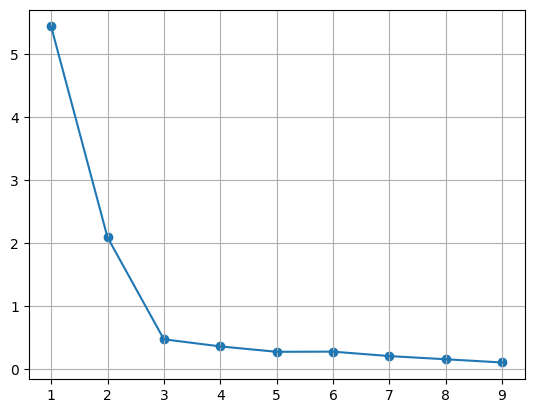

In [712]:
plt.plot(range(1,10),SSE)
plt.scatter(range(1,10),SSE)
plt.grid()


In [713]:
from sklearn.datasets import load_iris as iri

In [714]:
iris=iri()

In [715]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [716]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [718]:
df.drop(["sepal length (cm)","sepal width (cm)"], axis="columns", inplace=True)

In [719]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [720]:
mms.fit(df[["petal length (cm)","petal width (cm)"]])

df[["petal length (cm)","petal width (cm)"]]=mms.transform(df[["petal length (cm)","petal width (cm)"]])


In [721]:
df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [730]:
sse=[]
for i in range(1,25):
    km=KMeans(n_clusters=i)
    y=km.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)

In [731]:
sse

[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.4684543775855645,
 0.8538617353912238,
 0.8932264260503653,
 0.5955772574779121,
 0.5311407900797922,
 0.4401885127325661,
 0.363690889431517,
 0.354592787923955,
 0.31243416456994033,
 0.291828956355736,
 0.257692159955563,
 0.2610389630730079,
 0.24074150873971548,
 0.19754267853944374,
 0.1957569731311836,
 0.18029963636158297,
 0.16270704652685625,
 0.1496104412577693,
 0.14774341819400036,
 0.14833485130686305,
 0.1501808996454034]

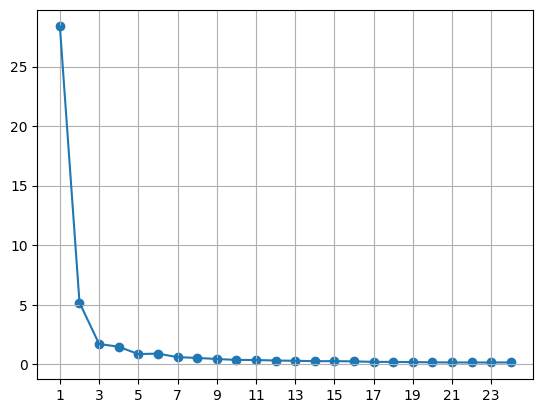

In [732]:
plt.scatter(range(1,25),sse)
plt.plot(range(1,25),sse)
plt.xticks(range(1,25,2))
plt.grid()

In [736]:
km=KMeans(n_clusters=3)
y=km.fit_predict(df[["petal length (cm)","petal width (cm)"]])


In [737]:
df["clusters"]=y

In [738]:
df

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


Text(0.5, 0, 'Petal Length (cm)')

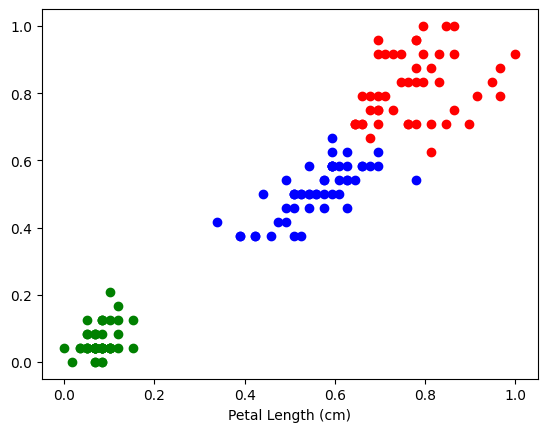

In [739]:
df1=df[df["clusters"]==0]
df2=df[df["clusters"]==1]
df3=df[df["clusters"]==2]
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color='red', label='Cluster 1')
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color='green', label='Cluster 2')
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"], color='blue', label='Cluster 3')
plt.xlabel('Petal Length (cm)')    

# NAIVE BAYES THEOREM

In [740]:
tt=pd.read_csv("titanic.csv")
tt.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [749]:
tt.drop(['Cabin',], axis='columns', inplace=True)

In [750]:
tt

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [751]:
target=tt['Survived']

In [768]:
inp=tt.drop(['Survived'] ,axis='columns')

In [769]:
dummies=pd.get_dummies(tt.Sex, dtype='int')

In [770]:
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [771]:
inp1=pd.concat([inp,dummies], axis='columns')

In [772]:
inp1

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [775]:
inpf=inp1.drop(["Sex"], axis='columns')

In [776]:
inpf

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,NaN,23.4500,1,0
889,1,26.0,30.0000,0,1


In [778]:
inpf.columns[inpf.isna().any()]

Index(['Age'], dtype='object')

In [790]:
inpf=inpf.dropna(axis='columns')

In [791]:
inpf

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
886,2,27.000000,13.0000,0,1
887,1,19.000000,30.0000,1,0
888,3,29.699118,23.4500,1,0
889,1,26.000000,30.0000,0,1


In [792]:
inpf.columns[inpf.isna().any()]

Index([], dtype='object')

In [793]:
from sklearn.model_selection import train_test_split as tts

In [794]:
x1,x2,y1,y2=tts(inpf,target,test_size=0.2)

In [795]:
from sklearn.naive_bayes import GaussianNB as gnb

In [796]:
model=gnb()

In [797]:
model.fit(x1,y1)

GaussianNB()

In [798]:
model.score(x2,y2)

0.7821229050279329

In [799]:
model.score(x1,y1)

0.7808988764044944

In [800]:
model.score(inpf,target)

0.7811447811447811

In [801]:
df=pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [803]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [807]:
df['spam']=df.Category.apply(lambda x: 1 if x=='spam' else 0)

In [848]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [877]:
x1,x2,y1,y2=tts(df.Message, df.spam , test_size=0.2)

AttributeError: 'DataFrame' object has no attribute 'spam'

In [876]:
x1.head()

4515    Sure, whenever you show the fuck up &gt;:(
3336     Sorry, got a late start, we're on the way
4503                     Wot is u up 2 then bitch?
1585                        Sorry, I'll call later
2383               I will reach before ten morning
Name: Message, dtype: object

In [851]:
from sklearn.feature_extraction.text import CountVectorizer as cv
cv=cv()

In [852]:
xtrain=cv.fit_transform(x1)

In [853]:
xtrain.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4457, 7791))

In [854]:
from sklearn.naive_bayes import MultinomialNB as mnb
model=mnb()

In [855]:
model.fit(xtrain,y1)

MultinomialNB()

In [856]:
email=["Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize.",
       "Hi, lets go to play together"]

In [857]:
xtest=cv.transform(email)

In [858]:
model.predict(xtest)

array([1, 0])

In [859]:
xtest2=cv.transform(x2)

In [860]:
model.score(xtest2,y2)

0.9865470852017937

In [869]:
from sklearn.pipeline import Pipeline as pp
from sklearn.feature_extraction.text import CountVectorizer as cv

In [871]:
clf=pp([{'vectorizer': cv() }, {'classifier': mnb()}])

In [879]:
df=pd.read_csv("spam.csv")

df['spam']=df.Category.apply(lambda x: 1 if x=='spam' else 0)


In [881]:
df.drop(['Category'], axis='columns', inplace=True)

In [882]:
df.head()

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [888]:
x1, x2, y1, y2 = tts(df.Message, df.spam, test_size=0.2)

In [893]:
clf = pp([
    ('vectorizer', cv()),
    ('classifier', mnb())
])

In [894]:
clf.fit(x1, y1 )

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [895]:
clf.score(x2,y2)

0.9829596412556054

In [896]:
clf.score(df.Message, df.spam)

0.9912060301507538

In [899]:
from sklearn.datasets import load_wine as lw
wine=lw()

In [900]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [902]:
wine.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [903]:
dw=pd.DataFrame(wine.data, columns=wine.feature_names)

In [922]:
dw

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [907]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [908]:
df=pd.DataFrame(wine.target)

In [923]:
fin=pd.concat([dw, df], axis='columns')

In [924]:
fin

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [925]:
from sklearn.naive_bayes import GaussianNB as gnb

In [926]:
model=gnb()

In [927]:
x1,x2,y1,y2=tts(dw, df, test_size=0.2)

In [928]:
model.fit(x1,y1)

c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [929]:
model.score(x2,y2)

0.9444444444444444

In [948]:
model.predict([[14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0]])

c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  


array([0])

In [930]:
model.score(dw,df)

0.9831460674157303

In [942]:
dw['wine']=df

In [943]:
dw

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [944]:
dw['wine']=dw['wine'].apply(lambda x: wine.target_names[x])

# HYPER PARAMETER TUNING

In [932]:
di=pd.DataFrame(iris.data, columns=iris.feature_names)

In [933]:
di

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [935]:
di['flower']=iris.target

In [936]:
di

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [939]:
di['flower']=di['flower'].apply(lambda x: iris.target_names[x])

In [940]:
di

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [949]:
from sklearn.model_selection import GridSearchCV as gsv

In [950]:
from sklearn.svm import SVC as svc

In [955]:
clf=gsv( svc(gamma='auto'),{'C':[1,10,20,40,100],'kernel':['rbf','linear']},cv=5)

In [957]:
clf.fit(iris.data, iris.target)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20, 40, 100],
                         'kernel': ['rbf', 'linear']})

In [959]:
res=pd.DataFrame(clf.cv_results_)

In [960]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001014,0.000210,0.000737,0.000227,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000762,0.000166,0.000627,0.000148,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001230,0.000280,0.000897,0.000145,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000510,0.000042,0.000371,0.000006,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000664,0.000228,0.000479,0.000073,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.000000,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000488,0.000016,0.000379,0.000008,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,6
6,0.000524,0.000010,0.000618,0.000418,40,rbf,"{'C': 40, 'kernel': 'rbf'}",1.000000,0.966667,0.900000,0.933333,1.0,0.960000,0.038873,8
7,0.000773,0.000167,0.000612,0.000165,40,linear,"{'C': 40, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.900000,1.0,0.960000,0.048990,8
8,0.000576,0.000030,0.000423,0.000023,100,rbf,"{'C': 100, 'kernel': 'rbf'}",1.000000,0.966667,0.900000,0.933333,1.0,0.960000,0.038873,8
9,0.000665,0.000252,0.000545,0.000187,100,linear,"{'C': 100, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,6


In [961]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [962]:
from sklearn.model_selection import RandomizedSearchCV as rsv

In [977]:
rscv=rsv(svc(gamma='auto'),{'C' :[1,10,20,50,100],"kernel":['rbf','linear']},cv=5, n_iter=15)

In [978]:
rscv.fit(iris.data, iris.target)

c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=15. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=15,
                   param_distributions={'C': [1, 10, 20, 50, 100],
                                        'kernel': ['rbf', 'linear']})

In [979]:
rscv.score(iris.data, iris.target)

0.9866666666666667

In [980]:
rscv.best_params_

{'kernel': 'rbf', 'C': 1}

In [981]:
rscv.best_score_

np.float64(0.9800000000000001)

In [982]:
pd.DataFrame(rscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001165,0.000280,0.001223,0.000577,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000978,0.000435,0.000615,0.000151,linear,1,"{'kernel': 'linear', 'C': 1}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001030,0.000324,0.000688,0.000178,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000584,0.000098,0.000455,0.000057,linear,10,"{'kernel': 'linear', 'C': 10}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000798,0.000193,0.000667,0.000229,rbf,20,"{'kernel': 'rbf', 'C': 20}",0.966667,1.000000,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000683,0.000155,0.000449,0.000078,linear,20,"{'kernel': 'linear', 'C': 20}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,6
6,0.000575,0.000052,0.000552,0.000212,rbf,50,"{'kernel': 'rbf', 'C': 50}",1.000000,0.966667,0.900000,0.933333,1.0,0.960000,0.038873,9
7,0.000678,0.000217,0.000483,0.000158,linear,50,"{'kernel': 'linear', 'C': 50}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,6
8,0.000565,0.000013,0.000418,0.000015,rbf,100,"{'kernel': 'rbf', 'C': 100}",1.000000,0.966667,0.900000,0.933333,1.0,0.960000,0.038873,9
9,0.000676,0.000165,0.000446,0.000069,linear,100,"{'kernel': 'linear', 'C': 100}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,6


In [1010]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [1012]:
print(model_params)
print(type(model_params))

{'svm': {'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}}, 'random_forest': {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 5, 10]}}, 'logistic_regression': {'model': LogisticRegression(multi_class='auto', solver='liblinear'), 'params': {'C': [1, 5, 10]}}}
<class 'dict'>


In [ ]:
for i,x in model_param

In [1016]:
scores = []

for model_name, mp in model_params.items():
    clf =  gsv(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(scores)
df

[{'model': 'svm', 'best_score': np.float64(0.9800000000000001), 'best_params': {'C': 1, 'kernel': 'rbf'}}, {'model': 'random_forest', 'best_score': np.float64(0.96), 'best_params': {'n_estimators': 10}}, {'model': 'logistic_regression', 'best_score': np.float64(0.9666666666666668), 'best_params': {'C': 5}}]


c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\aditya\AppData\Local\Programs\Pyth

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 10}
2,logistic_regression,0.966667,{'C': 5}


In [988]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [989]:
from sklearn.datasets import load_digits as ld

In [990]:
ld=ld()

In [1023]:
x=np.arange(10,100,10)

In [1026]:
modelparmas={ 
    'svm':{
        'model': svc(gamma='auto'),
        'params': {'C':x, 'kernel':['rbf','linear']}
    }
    ,'random_forest':{
        'model': RandomForestClassifier(),
        'params': {'n_estimators':[1,5,10]}
    },'logistic_regression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {'C':[1,5,10]}
    },'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params': {'criterion':['gini','entropy']}
    },'gaussian_nb':{
        'model': GaussianNB(),
        'params': {}
    },'multinomial_nb':{
        'model': MultinomialNB(),
        'params': {}
    }
}

In [1006]:
print(modelparmas)
print(type(modelparmas))

{'svm': {'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 20, 50, 100], 'kernel': ['rbf', 'linear']}}, 'random_forest': {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 5, 10]}}, 'logistic_regression': {'model': LogisticRegression(multi_class='auto', solver='liblinear'), 'params': {'C': [1, 5, 10]}}, 'decision_tree': {'model': DecisionTreeClassifier(), 'params': {'criterion': ['gini', 'entropy']}}, 'gaussian_nb': {'model': GaussianNB(), 'params': {}}, 'multinomial_nb': {'model': MultinomialNB(), 'params': {}}}
<class 'dict'>


In [1014]:
for i,x in modelparmas.items():
    print(i,x)

svm {'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 20, 50, 100], 'kernel': ['rbf', 'linear']}}
random_forest {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 5, 10]}}
logistic_regression {'model': LogisticRegression(multi_class='auto', solver='liblinear'), 'params': {'C': [1, 5, 10]}}
decision_tree {'model': DecisionTreeClassifier(), 'params': {'criterion': ['gini', 'entropy']}}
gaussian_nb {'model': GaussianNB(), 'params': {}}
multinomial_nb {'model': MultinomialNB(), 'params': {}}


In [1027]:
score=[]

for model, mp in modelparmas.items():
    clf=gsv(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit( ld.data, ld.target)
    score.append({
        'model': model,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })



c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\aditya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\aditya\AppData\Local\Programs\Pyth

In [1028]:
pd.DataFrame(score)

,model,best_score,best_params
0,svm,0.947697,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.909313,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
3,decision_tree,0.808596,{'criterion': 'entropy'}
4,gaussian_nb,0.806928,{}
5,multinomial_nb,0.870350,{}


# L1, L2 REGULARISATION

In [1070]:
import warnings
warnings.filterwarnings("ignore")

In [1071]:
mb=pd.read_csv("Melbourne_housing_FULL.csv")

In [1072]:
mb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [1073]:
mb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [1074]:
mb.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [1075]:
mb[0:2]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [1076]:
mb.drop(['Address', 'SellerG', 'Date','CouncilArea','Lattitude','Longtitude','Regionname'], axis='columns', inplace=True)

In [1077]:
mb.head()

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,Abbotsford,2,h,NaN,SS,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,4019.0
1,Abbotsford,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,4019.0
2,Abbotsford,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
3,Abbotsford,3,u,NaN,VB,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,4019.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0


In [1078]:
mb.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
Propertycount        3
dtype: int64

In [1088]:
f0=['Bedroom2','Bathroom','Car','Distance','Postcode','Propertycount']
mb[f0]=mb[f0].fillna(0)

In [1089]:
mb

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,Abbotsford,2,h,NaN,SS,2.5,3067.0,2.0,1.0,1.0,126.000000,160.2564,NaN,4019.0
1,Abbotsford,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.000000,160.2564,NaN,4019.0
2,Abbotsford,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.000000,79.0000,1900.0,4019.0
3,Abbotsford,3,u,NaN,VB,2.5,3067.0,3.0,2.0,1.0,0.000000,160.2564,NaN,4019.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.000000,150.0000,1900.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,6.3,3013.0,4.0,1.0,3.0,593.000000,160.2564,NaN,6543.0
34853,Yarraville,2,h,888000.0,SP,6.3,3013.0,2.0,2.0,1.0,98.000000,104.0000,2018.0,6543.0
34854,Yarraville,2,t,705000.0,S,6.3,3013.0,2.0,1.0,2.0,220.000000,120.0000,2000.0,6543.0
34855,Yarraville,3,h,1140000.0,SP,6.3,3013.0,0.0,0.0,0.0,593.598993,160.2564,NaN,6543.0


In [1090]:
mb.Landsize=mb.Landsize.fillna(mb.Landsize.mean())
mb.BuildingArea=mb.BuildingArea.fillna(mb.BuildingArea.mean())

In [1091]:
mb.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea         0
YearBuilt        19306
Propertycount        0
dtype: int64

In [1095]:
mb.YearBuilt=mb.YearBuilt.fillna(mb.YearBuilt.mean())   
mb

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,Abbotsford,2,h,NaN,SS,2.5,3067.0,2.0,1.0,1.0,126.000000,160.2564,1965.289885,4019.0
1,Abbotsford,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.000000,160.2564,1965.289885,4019.0
2,Abbotsford,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.000000,79.0000,1900.000000,4019.0
3,Abbotsford,3,u,NaN,VB,2.5,3067.0,3.0,2.0,1.0,0.000000,160.2564,1965.289885,4019.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.000000,150.0000,1900.000000,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,6.3,3013.0,4.0,1.0,3.0,593.000000,160.2564,1965.289885,6543.0
34853,Yarraville,2,h,888000.0,SP,6.3,3013.0,2.0,2.0,1.0,98.000000,104.0000,2018.000000,6543.0
34854,Yarraville,2,t,705000.0,S,6.3,3013.0,2.0,1.0,2.0,220.000000,120.0000,2000.000000,6543.0
34855,Yarraville,3,h,1140000.0,SP,6.3,3013.0,0.0,0.0,0.0,593.598993,160.2564,1965.289885,6543.0


In [1096]:
mb.dropna(axis='rows', inplace=True)

In [1097]:
mb.shape

(27247, 14)

In [1100]:
mb=pd.get_dummies(mb,drop_first=True,dtype='int')

In [1104]:
mb.replace({False:0,True:1},inplace=True)

In [1105]:
mb

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Suburb_Yarra Glen,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.000000,160.2564,1965.289885,...,0,0,0,0,0,0,1,0,0,0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.000000,79.0000,1900.000000,...,0,0,0,0,0,0,1,0,0,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.000000,150.0000,1900.000000,...,0,0,0,0,0,0,0,0,1,0
5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.000000,160.2564,1965.289885,...,0,0,0,0,0,0,0,0,0,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.000000,142.0000,2014.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,3013.0,4.0,1.0,3.0,593.000000,160.2564,1965.289885,...,0,1,0,0,0,0,0,0,0,0
34853,2,888000.0,6.3,3013.0,2.0,2.0,1.0,98.000000,104.0000,2018.000000,...,0,1,0,0,0,0,0,0,1,0
34854,2,705000.0,6.3,3013.0,2.0,1.0,2.0,220.000000,120.0000,2000.000000,...,0,1,0,0,1,0,1,0,0,0
34855,3,1140000.0,6.3,3013.0,0.0,0.0,0.0,593.598993,160.2564,1965.289885,...,0,1,0,0,0,0,0,0,1,0


In [1114]:
x1, x2, y1, y2 = tts(mb.drop(['Price'], axis='columns'), mb['Price'], test_size=0.2)

In [1115]:
from sklearn.linear_model import LinearRegression as lr

In [1116]:
model=lr()

In [1117]:
model.fit(x1,y1)

LinearRegression()

In [1118]:
model.score(x2,y2)

0.6621926583129372

In [1119]:
model.score(x1,y1)

0.6614001498989952

In [1120]:
from sklearn import linear_model as lm

lasso=lm.Lasso(alpha=0.1)

lasso.fit(x1,y1)

Lasso(alpha=0.1)

In [1121]:
lasso.score(x2,y2)

0.6623116821149927

In [1122]:
lasso.score(x1,y1)

0.6613963437239196

In [1123]:
from sklearn.linear_model import Ridge 

In [1125]:
rid=Ridge()

In [1126]:
rid.fit(x1,y1)

Ridge()

In [1127]:
rid.score(x2,y2)

0.664692045309403

In [1128]:
rid.score(x1,y1)

0.6610796969649027

In [1132]:
yp=rid.predict(x2)

# K NEAREST NEIGHBOUR CLASSIFICATION (KNN)

In [16]:
from sklearn.datasets import load_digits as ld

In [17]:
dig=ld()

In [19]:
from sklearn.model_selection import train_test_split as tts

In [25]:
dir(dig)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [27]:
dig.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [30]:
x1,x2,y1,y2=tts(dig.data, dig.target,test_size=0.2)

In [22]:
from sklearn.neighbors import KNeighborsClassifier as knc

In [68]:
model=knc(n_neighbors=3)

In [33]:
from sklearn.model_selection import GridSearchCV as gscv

In [36]:
import numpy as np

In [40]:
x=np.arange(1,15)


In [56]:
clf=gscv(model, {'n_neighbors':x}, cv=5)

In [42]:
clf.fit(x1,y1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [50]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001694,0.001347,0.003012,0.001496,1,{'n_neighbors': 1},0.968750,0.979167,0.996516,0.986063,0.986063,0.983312,0.009151,6
1,0.000508,0.000020,0.001647,0.000259,2,{'n_neighbors': 2},0.968750,0.979167,0.989547,0.993031,0.986063,0.983312,0.008604,6
2,0.000608,0.000127,0.001898,0.000356,3,{'n_neighbors': 3},0.972222,0.982639,0.993031,0.996516,0.986063,0.986094,0.008498,2
3,0.000643,0.000233,0.002014,0.000499,4,{'n_neighbors': 4},0.965278,0.982639,0.989547,0.996516,0.986063,0.984008,0.010431,5
4,0.000611,0.000117,0.001969,0.000173,5,{'n_neighbors': 5},0.972222,0.982639,0.993031,0.996516,0.989547,0.986791,0.008609,1
5,0.000801,0.000245,0.002449,0.000239,6,{'n_neighbors': 6},0.961806,0.982639,0.993031,0.989547,0.993031,0.984011,0.011733,4
6,0.000612,0.000156,0.002106,0.000381,7,{'n_neighbors': 7},0.968750,0.979167,0.993031,0.989547,0.993031,0.984705,0.009459,3
7,0.000699,0.000162,0.002510,0.000524,8,{'n_neighbors': 8},0.961806,0.979167,0.993031,0.986063,0.993031,0.982620,0.011609,8
8,0.000575,0.000091,0.002122,0.000488,9,{'n_neighbors': 9},0.961806,0.979167,0.989547,0.982578,0.993031,0.981226,0.010880,9
9,0.000784,0.000170,0.002744,0.000078,10,{'n_neighbors': 10},0.965278,0.982639,0.979094,0.979094,0.993031,0.979827,0.008888,10


In [69]:
model.fit(x1,y1)

KNeighborsClassifier(n_neighbors=3)

In [70]:
model.score(x2,y2)

0.9972222222222222

In [71]:
model.score(x1,y1)

0.9923451635351427

In [72]:
model.score(dig.data, dig.target)

0.9927657206455203

In [73]:
yp=model.predict(x2)

In [74]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cmx

In [75]:
cm=cmx(y2,yp)

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

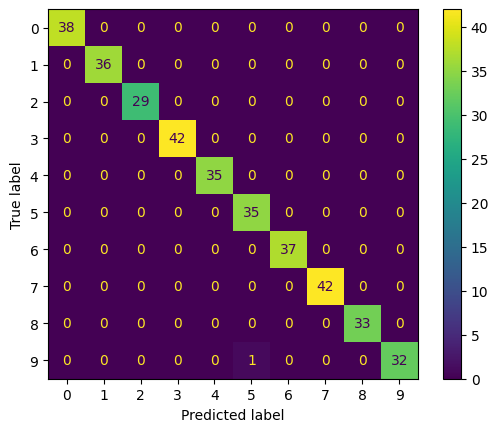

In [79]:
cmd(cm, display_labels=dig.target_names).plot()

In [81]:
dig

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

# PCA

In [86]:
import matplotlib.pyplot as plt

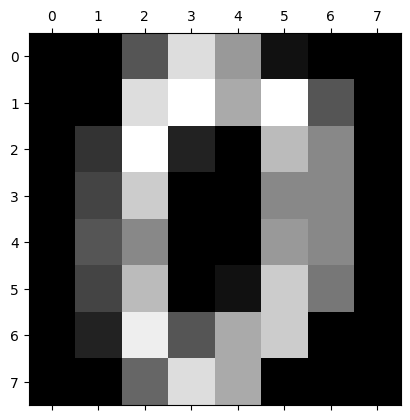

In [94]:
plt.matshow(dig.images[0])


In [95]:
df=pd.DataFrame(dig.data, columns=dig.feature_names)

In [96]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [97]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [101]:
from sklearn.preprocessing import StandardScaler as ss

In [104]:
scaler=ss()
xscaler=scaler.fit_transform(df)

In [105]:
x1,x2,y1,y2 =tts(xscaler, dig.target, test_size=0.2)

In [106]:
from sklearn.linear_model import LogisticRegression as lr

In [107]:
model=lr()
model.fit(x1,y1)

LogisticRegression()

In [108]:
model.score(x2,y2)

0.9666666666666667

In [109]:
from sklearn.decomposition import PCA

In [111]:
pc=PCA(.95)

In [129]:
x_pca=pc.fit_transform(xscaler)

In [124]:
x_pca.shape

(1437, 39)

In [130]:
x1, x2, y1, y2 = tts(x_pca, dig.target, test_size=0.2)

In [131]:
model.fit(x1,y1)

LogisticRegression()

In [132]:
model.score(x2,y2)

0.9527777777777777

In [133]:
model.score(x_pca, dig.target)

0.9872008903728436

# BIAS AND VARIANCE

# feature engineering

In [250]:
a=np.random.randint(0,16,12)

In [251]:
a

array([11,  7, 13, 14,  0,  5,  3,  6, 14, 12,  2, 11], dtype=int32)

In [252]:
a=pd.DataFrame(a,columns=['height'])

In [253]:
a

,height
0,11
1,7
2,13
3,14
4,0
5,5
6,3
7,6
8,14
9,12


In [254]:
min=a.height.quantile(0.10)
min

np.float64(2.1)

In [255]:
a[a.height<min]

,height
4,0
10,2


In [257]:
a.drop(a[a.height<min].index, inplace=True)

In [259]:
a

,height
0,11
1,7
2,13
3,14
5,5
6,3
7,6
8,14
9,12
11,11


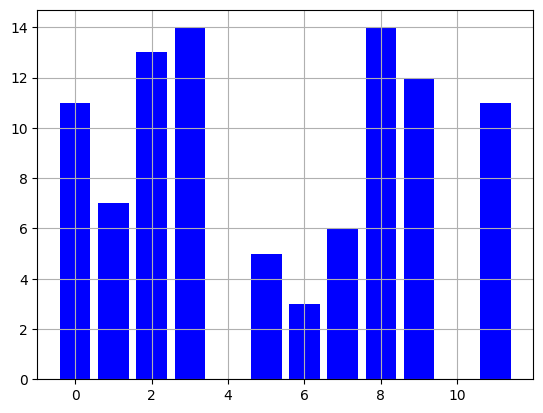

In [260]:
plt.bar(a.index, a.height, color='blue')
plt.grid()

In [282]:
bh=pd.read_csv("bhp.csv")
bh.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [285]:
a=[]
for i in bh["size"]:
    b=i[0]
    a.append(b)

a


['2',
 '4',
 '3',
 '3',
 '2',
 '2',
 '4',
 '4',
 '3',
 '6',
 '3',
 '4',
 '2',
 '2',
 '3',
 '2',
 '3',
 '3',
 '3',
 '2',
 '1',
 '3',
 '4',
 '3',
 '1',
 '3',
 '2',
 '3',
 '2',
 '3',
 '4',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2',
 '3',
 '3',
 '2',
 '2',
 '3',
 '1',
 '1',
 '2',
 '8',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '2',
 '3',
 '2',
 '2',
 '6',
 '2',
 '3',
 '2',
 '4',
 '2',
 '8',
 '2',
 '2',
 '2',
 '8',
 '2',
 '3',
 '2',
 '3',
 '2',
 '3',
 '2',
 '2',
 '3',
 '2',
 '6',
 '3',
 '2',
 '3',
 '3',
 '6',
 '3',
 '2',
 '2',
 '6',
 '2',
 '2',
 '3',
 '4',
 '2',
 '3',
 '4',
 '3',
 '2',
 '3',
 '3',
 '2',
 '3',
 '2',
 '2',
 '2',
 '3',
 '3',
 '2',
 '2',
 '3',
 '3',
 '2',
 '3',
 '4',
 '3',
 '3',
 '3',
 '2',
 '2',
 '3',
 '3',
 '4',
 '4',
 '3',
 '2',
 '3',
 '2',
 '2',
 '7',
 '3',
 '3',
 '2',
 '4',
 '3',
 '2',
 '2',
 '2',
 '3',
 '3',
 '8',
 '5',
 '3',
 '2',
 '2',
 '7',
 '3',
 '2',
 '3',
 '6',
 '3',
 '2',
 '3',
 '3',
 '2',
 '2',
 '2',
 '3',
 '3',
 '4',
 '3',
 '2',
 '3',
 '4',
 '3',
 '2',
 '3',
 '3',
 '2'

In [286]:
if isinstance(a, str):
    print("a has a string")
    print(a)
else:
    print("a does not have a string")
    

a does not have a string


In [287]:
bh['size']=a

In [288]:
bh

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3,1521.0,3.0,95.00,3,6245
4,Kothanur,2,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5,3453.0,4.0,231.00,5,6689
13196,other,4,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4,4689.0,4.0,488.00,4,10407


In [290]:
a=pd.get_dummies(bh['location'],drop_first=True, dtype='int')

In [291]:
a

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [292]:
final=pd.concat([bh,a],axis='columns')

In [354]:
final.drop(['size'], axis='columns', inplace=True)

In [355]:
final

,total_sqft,bath,price,bhk,price_per_sqft,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,39.07,2,3699,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13196,3600.0,5.0,400.00,4,11111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13197,1141.0,2.0,60.00,2,5258,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13198,4689.0,4.0,488.00,4,10407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [356]:
input=final.drop(['price'], axis='columns')
input

,total_sqft,bath,bhk,price_per_sqft,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,2,3699,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,4615,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,4305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,6245,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,4250,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,3453.0,4.0,5,6689,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13196,3600.0,5.0,4,11111,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13197,1141.0,2.0,2,5258,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13198,4689.0,4.0,4,10407,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [357]:
target=final['price']

In [358]:
target

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13195    231.00
13196    400.00
13197     60.00
13198    488.00
13199     17.00
Name: price, Length: 13200, dtype: float64

In [359]:
from sklearn.linear_model import LinearRegression as lm

In [298]:
model=lm()


In [299]:
x1,x2,y1,y2=tts(input,target,test_size=0.2)

In [361]:
model.fit(x1,y1)

LinearRegression()

In [362]:
model.score(x2,y2)

0.1651058004203213

In [363]:
model.score(x1,y1)

0.5176257634644683

In [364]:
final.bhk.quantile(0.99)

np.float64(8.0)

In [365]:
bh.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [372]:
a,b=bh.price_per_sqft.quantile([0.001,0.9985])

In [373]:
print(a,b)

1366.184 43467.40050000069


In [374]:
f1=final[bh.price_per_sqft<b]

In [375]:
f2=f1[bh.price_per_sqft>a]

C:\Users\aditya\AppData\Local\Temp\ipykernel_21376\1551243427.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f2=f1[bh.price_per_sqft>a]


In [376]:
f2

,total_sqft,bath,price,bhk,price_per_sqft,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,39.07,2,3699,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13196,3600.0,5.0,400.00,4,11111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13197,1141.0,2.0,60.00,2,5258,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13198,4689.0,4.0,488.00,4,10407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [377]:
f2.describe()

,total_sqft,bath,price,bhk,price_per_sqft,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
count,13166.000000,13166.000000,13166.000000,13166.000000,13166.00000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,...,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000
mean,1537.614669,2.689048,111.176519,2.798724,6644.78209,0.001823,0.000835,0.001823,0.000911,0.002962,...,0.000987,0.000911,0.003266,0.040331,0.001519,0.015798,0.003038,0.000987,0.006456,0.216770
std,965.980941,1.333747,141.853649,1.289315,4046.23281,0.042658,0.028894,0.042658,0.030177,0.054347,...,0.031408,0.030177,0.057058,0.196742,0.038947,0.124699,0.055038,0.031408,0.080093,0.412061
min,250.000000,1.000000,8.000000,1.000000,1379.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1100.000000,2.000000,50.000000,2.000000,4270.25000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1274.500000,2.000000,71.500000,3.000000,5434.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1669.750000,3.000000,120.000000,3.000000,7307.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30400.000000,40.000000,2912.000000,43.000000,43333.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [378]:
input=f2.drop(['price'], axis='columns')

In [381]:
target=f2['price']

In [382]:
x1,x2,y1,y2=tts(input,target,test_size=0.2)

In [383]:
model.fit(x1,y1)

LinearRegression()

In [384]:
model.score(x2,y2)

0.814419133201139

In [385]:
model.score(x1,y1)

0.8468352760871471

In [386]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [387]:
model=dtr()

In [388]:
model.fit(x1,y1)

DecisionTreeRegressor()

In [389]:
model.score(x2,y2)

0.9867922117278348

In [390]:
model.score(x1,y1)

0.9999999999982415

In [391]:
y=model.predict(x2)

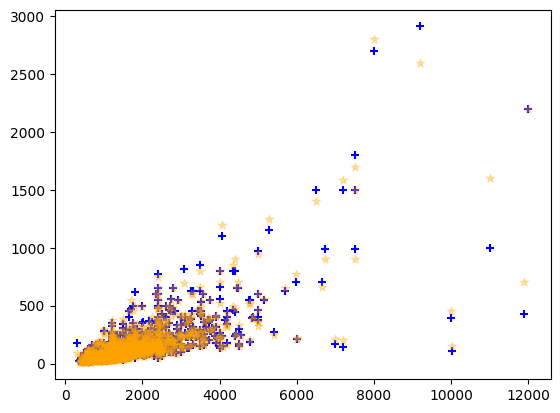

In [412]:
plt.scatter(x2.total_sqft, y, color='blue', marker='+')
plt.scatter(x2.total_sqft, y2, color='orange', marker='*',alpha=0.3)
# plt.figure(figsize=(500,10))

In [463]:
ny=pd.read_csv("AB_NYC_2019.csv")
ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [464]:
ny=ny.drop(['id','name','host_id','host_name','last_review'], axis='columns')

In [465]:
ny

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [466]:
ny.fillna(0, inplace=True)

In [467]:
ny

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [471]:
a=ny.price.quantile(0.999)

In [472]:
ny=ny[ny.price<a]

In [473]:
ny

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [474]:
ny=ny.drop('neighbourhood_group', axis='columns')

In [506]:
b=pd.get_dummies(ny['neighbourhood'], dtype='int',drop_first=True)

KeyError: 'neighbourhood'

In [507]:
c=pd.get_dummies(ny['room_type'], dtype='int',drop_first=True)

KeyError: 'room_type'

In [ ]:
ny=pd.concat([ny, b, c], axis='columns')

In [ ]:
ny=ny.drop(['neighbourhood','room_type'], axis='columns')

In [508]:
x1, x2, y1, y2 = tts(ny.drop('price', axis=1), ny['price'], test_size=0.2)

In [509]:
model=lm()

In [510]:
model.fit(x1,y1)

LinearRegression()

In [511]:
model.score(x1,y1)

0.24381514284737826

In [512]:
m2 = dtr() 

In [513]:
m2.fit(x1,y1)

DecisionTreeRegressor()

In [514]:
m2.score(x1,y1)

1.0

In [515]:
m2.score(x2,y2)

-0.28300483505895313

In [516]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(m2, x1, y1, cv=5, scoring='r2')
print("Cross-validated R²:", scores.mean())

Cross-validated R²: -0.3640927392450256


In [517]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)
rf.fit(x1, y1)
print("Test R²:", rf.score(x1, y1))

Test R²: 0.4083944789584577


In [518]:
rf.score(x2, y2)

0.3181758211633723

In [519]:
rf.score(x1,y1)

0.4083944789584577

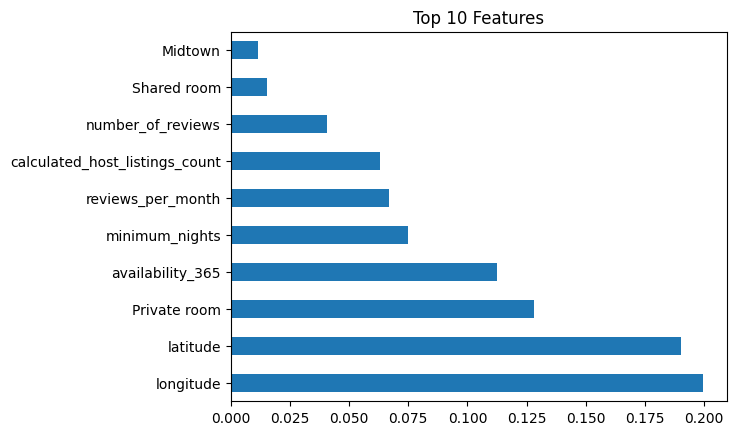

In [ ]:


feat_imp = pd.Series(m2.feature_importances_, index=x1.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features")
plt.show()


In [520]:
import pandas as pd

df = pd.read_csv('AB_NYC_2019.csv')
print(df.shape)
df.head()


(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [521]:
# Drop irrelevant or identifier columns
df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

# Drop rows with missing values (mostly reviews_per_month)
df.dropna(inplace=True)

# Remove 0 or negative prices
df = df[df['price'] > 0]

# Remove outliers in price (top 0.1%)
df = df[df['price'] < df['price'].quantile(0.999)]


In [538]:
import numpy as np
df=df.drop('log_price',axis='columns')


In [539]:
df

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365,True,...,False,False,False,False,False,False,False,False,True,False
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355,False,...,False,False,False,False,False,False,False,False,False,False
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194,True,...,False,False,False,False,False,False,False,False,False,False
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0,False,...,False,False,False,False,False,False,False,False,False,False
5,7322,40.74767,-73.97500,200,3,74,0.59,1,129,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,83554966,40.78099,-73.95366,129,1,1,1.00,1,147,False,...,False,False,False,False,False,False,False,False,True,False
48790,257683179,40.75104,-73.81459,45,1,1,1.00,6,339,False,...,False,False,False,False,False,False,False,False,True,False
48799,211644523,40.54179,-74.14275,235,1,1,1.00,1,87,False,...,False,False,False,False,False,False,False,False,True,False
48805,273841667,40.80787,-73.92400,100,1,2,2.00,1,40,False,...,False,False,False,False,False,False,False,False,False,False


In [541]:
X = df.drop('price', axis=1)
y = df['price']


In [542]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [543]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
)
model.fit(X_train, y_train)


RandomForestRegressor()

In [544]:
model.score(X_test, y_test)

0.4303988841690124

In [545]:
model.score(X_train, y_train)

0.9187611732317185

In [546]:
df=pd.read_csv("weight-height.csv")

In [547]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


(array([  3.,   6.,  14.,  40.,  59., 119., 186., 321., 419., 556., 632.,
        718., 720., 738., 738., 753., 739., 675., 640., 513., 459., 387.,
        219., 159.,  95.,  44.,  24.,  16.,   4.,   4.]),
 array([54.26313333, 55.08765363, 55.91217393, 56.73669423, 57.56121453,
        58.38573483, 59.21025513, 60.03477543, 60.85929573, 61.68381603,
        62.50833633, 63.33285663, 64.15737693, 64.98189723, 65.80641754,
        66.63093784, 67.45545814, 68.27997844, 69.10449874, 69.92901904,
        70.75353934, 71.57805964, 72.40257994, 73.22710024, 74.05162054,
        74.87614084, 75.70066114, 76.52518144, 77.34970174, 78.17422205,
        78.99874235]),
 <BarContainer object of 30 artists>)

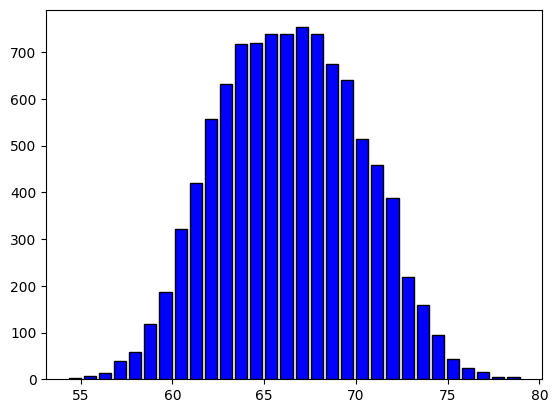

In [557]:
plt.hist(df['Height'], bins=30, color='blue', alpha=1, edgecolor='black',rwidth=0.8)

In [560]:
from scipy.stats import norm

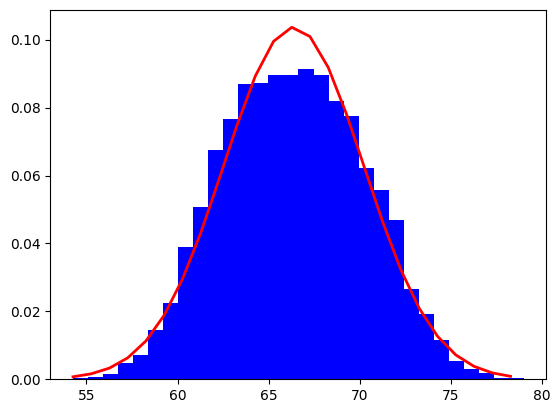

In [576]:
plt.hist(df['Height'], bins=30, color='blue',density=True)
rng=np.arange(df.Height.min(),df.Height.max())

plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()),linewidth=2, color='red')

